# Principal Component Analysis

## PCA concept
![image-5](image-5.png)

- Describe the information captured by two features by using two perpendicular vectors that are aligned with the variance in the data. 
- Positive component for red vector describes people have higher footlength as handleangth.
- Negative component for red vector describes people have lower footlength as handlength.
- Positive component for yellow vector describes people have longer footlength but shorter handlength.
- Negative component for yellow vector describes people have shorter footlength but longer handlength.

In [1]:
import pandas as pd
ansur_f = pd.read_csv('datasets/ANSUR_II_FEMALE.csv')
ansur_m = pd.read_csv('datasets/ANSUR_II_MALE.csv')

ansur_df = pd.concat([ansur_f,ansur_m])
ansur_df.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,...,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,...,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,...,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,...,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,173,818,78.2,1.660,28.378575,Overweight,Normal
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,...,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,152,762,88.6,1.572,35.853259,Overweight,Normal


In [2]:
ansur_df.shape

(6068, 99)

In [3]:
# List of non-numeric features
non_numeric = ['Branch','Component','Gender','BMI_class','Height_class']

In [4]:
ansur_df.drop(non_numeric,axis=1,inplace=True)
ansur_df.shape

(6068, 94)

In [5]:
sample_ansur = ansur_df[['BMI','buttockheight','waistcircumference','shouldercircumference']]
sample_ansur.head()

,BMI,buttockheight,waistcircumference,shouldercircumference
0,26.997041,836,850,1062
1,19.262506,900,708,1014
2,22.647148,861,727,1049
3,28.378575,897,923,1121
4,35.853259,811,1163,1151


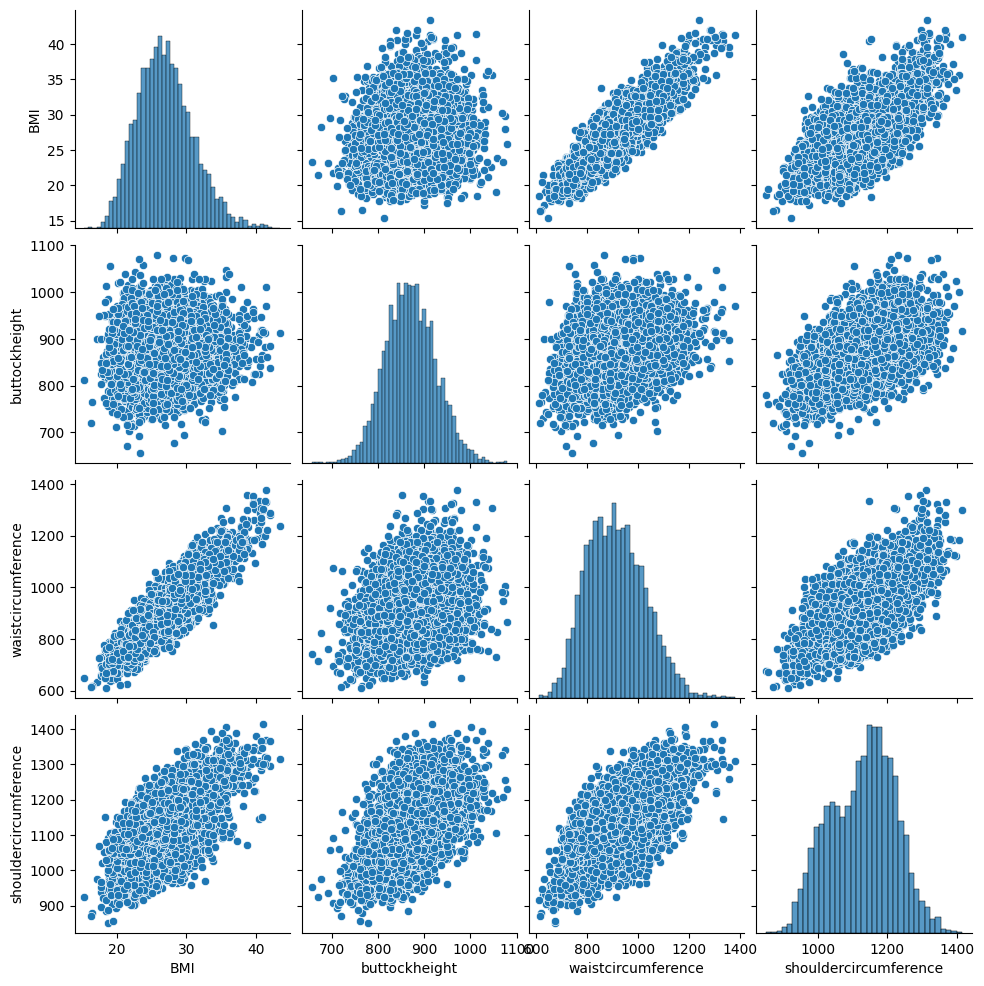

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.pairplot(sample_ansur, diag_kind='hist')
plt.show()

From this pairplot, 'waistcircumference' & 'BMI' are seen to be positively correlated to one another.

In [7]:
# Decorrelating with PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Instantiate StandardScaler 
scaler = StandardScaler()
# Fit-Transform to Standard
sample_ansur_std = scaler.fit_transform(sample_ansur)

# Instantiate PCA
pca = PCA()
# Fit-Transform PCA to get principle components
pc = pca.fit_transform(sample_ansur_std)
pc

array([[-0.90366277, -0.52941865,  0.06376511,  0.36407826],
       [-2.5577544 ,  1.49217169,  0.19144066,  0.09897618],
       [-2.02634789,  0.57313181, -0.23828854,  0.38083455],
       ...,
       [ 0.89444235, -0.49035415, -0.17579603, -0.18831724],
       [-0.59117567,  1.04329113, -0.65947293,  0.36898957],
       [ 2.3802414 ,  1.27380677,  0.66045538, -0.23213934]])

PCA yields 4 principal components since, there are 4 features.

i.e no. of features = no. of principal components by PCA()

In [8]:
# Creating a DataFrame : decorrelated data using PCA to visualize
pca_df = pd.DataFrame(pc, columns=['PC1','PC2','PC3','PC4'])
pca_df

,PC1,PC2,PC3,PC4
0,-0.903663,-0.529419,0.063765,0.364078
1,-2.557754,1.492172,0.191441,0.098976
2,-2.026348,0.573132,-0.238289,0.380835
3,0.335695,0.220853,0.327398,0.329875
4,2.204483,-2.380408,0.589430,-0.041003
...,...,...,...,...
6063,-1.075996,0.622209,-0.130272,0.049418
6064,1.126738,0.262437,-0.087778,-0.055468
6065,0.894442,-0.490354,-0.175796,-0.188317
6066,-0.591176,1.043291,-0.659473,0.368990


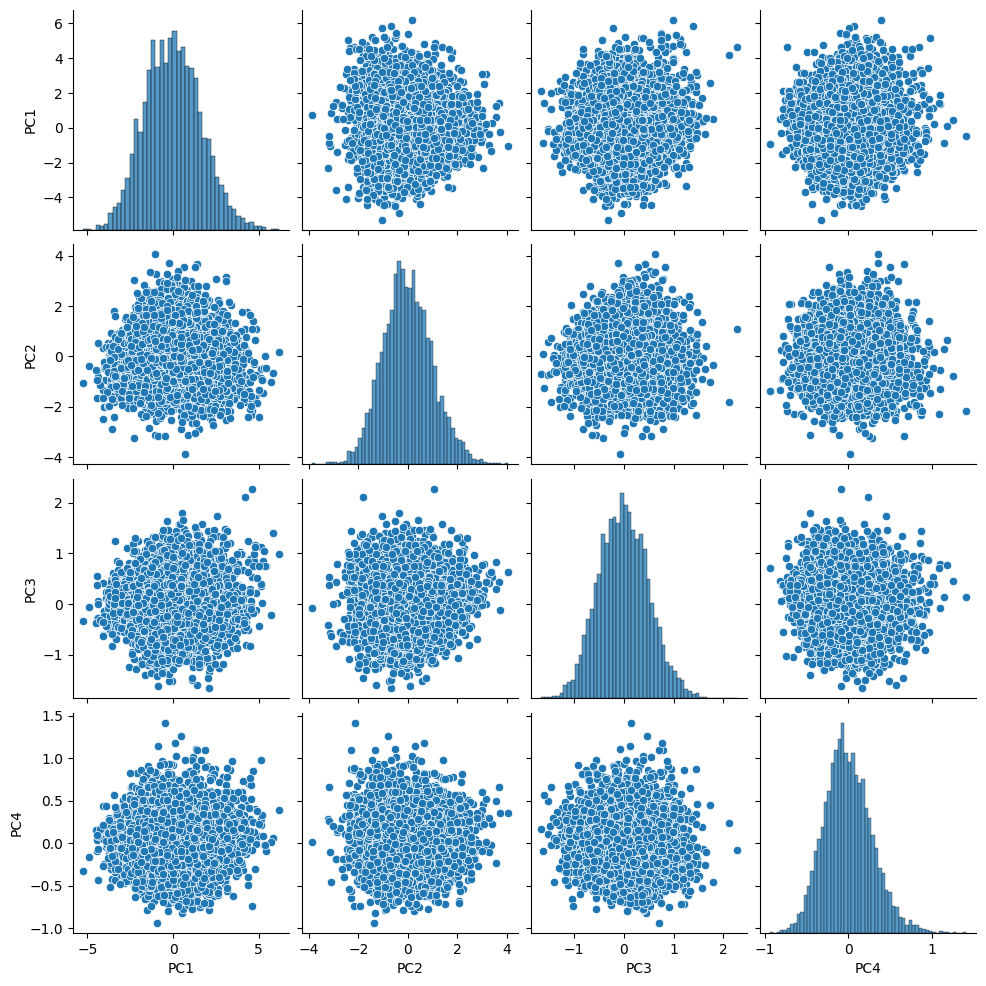

In [9]:
# Visualizing the priciple components, output from PCA that decorrelates the features
sns.pairplot(pca_df,diag_kind='hist')
plt.show()

In [10]:
# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[0.66836697 0.24777611 0.06323386 0.02062306]


PC1 explains around 67% of the variance, similarly PC2 explains 25% of the variance and others explains lower than that which means the other principal components are not as significant as PC1 and PC2.

In [11]:
# Cummulative sum of explained variance ratio per component
print(pca.explained_variance_ratio_.cumsum())

[0.66836697 0.91614308 0.97937694 1.        ]


Around 92% of the variance are explained by PC1 and PC2. Other can be dropped by sacrificing around 8% of the explained variance.

### Understanding the components

In [12]:
print(pca.components_)

[[ 0.53862915  0.31328928  0.56094112  0.54504452]
 [-0.42569232  0.83717688 -0.26774053  0.21502542]
 [ 0.08239589  0.39347507  0.46661559 -0.78781862]
 [ 0.72240958  0.21485361 -0.62922966 -0.18982193]]


PC1 = 0.53 x BMI + 0.31 x buttockheight + 0.56 x waistcircumference + 0.54 x shouldercircumference

PC2 = -0.42 x BMI + 0.83 x buttockheight + (-0.26) x waistcircumference + 0.21 x shouldercircumference

PC3 = 0.08 x BMI + 0.39 x buttockheight + 0.46 x waistcircumference + (-0.78) x shouldercircumference

PC4 = 0.72 x BMI + 0.21 x buttockheight + (-0.62) x waistcircumference + (-0.18) x shouldercircumference

This summarizes to what extent each component's vector is affected by a particular feature.

# PCA Applications
- Dimension reductionality

In [25]:
import pandas as pd
pokemon = pd.read_csv('datasets/pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [26]:
poke_df = pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
poke_cat_df = pokemon[['Type 1','Type 2','Legendary']]

In [27]:
poke_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [28]:
poke_cat_df.head()

,Type 1,Type 2,Legendary
0,Grass,Poison,False
1,Grass,Poison,False
2,Grass,Poison,False
3,Grass,Poison,False
4,Fire,NaN,False


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Build a pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))]) #<-- create only 2 principal components and discard other i.e dimension reduction

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)
pc

array([[-1.5563747 , -0.02148212],
       [-0.36286656, -0.05026854],
       [ 1.28015158, -0.06272022],
       ...,
       [ 2.45821626, -0.51588158],
       [ 3.5303971 , -0.95106516],
       [ 2.23378629,  0.53762985]])

In [30]:
# Inspect the explained variance ratio per component
pipe['reducer'].explained_variance_ratio_

array([0.45190665, 0.18225358])

The principal components given by the PCA explains around 63% of the variance and its because only 2 components are selected. 

In [34]:
# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

print(poke_cat_df)

      Type 1  Type 2  Legendary      PC 1      PC 2
0      Grass  Poison      False -1.556375 -0.021482
1      Grass  Poison      False -0.362867 -0.050269
2      Grass  Poison      False  1.280152 -0.062720
3      Grass  Poison      False  2.620916  0.704263
4       Fire     NaN      False -1.758284 -0.706179
..       ...     ...        ...       ...       ...
795     Rock   Fairy       True  2.307521  2.303187
796     Rock   Fairy       True  3.539772 -0.811013
797  Psychic   Ghost       True  2.458216 -0.515882
798  Psychic    Dark       True  3.530397 -0.951065
799     Fire   Water       True  2.233786  0.537630

[800 rows x 5 columns]


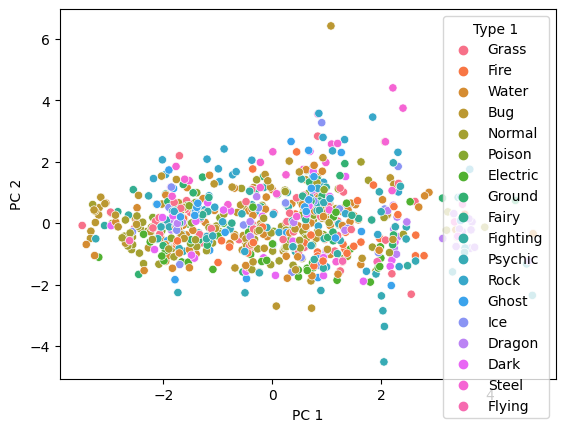

In [32]:
# Use the Type 1 feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

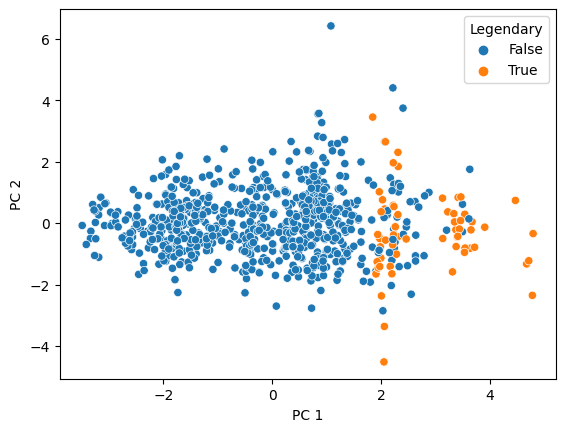

In [33]:
# Use the Legendary feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df, 
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()

### PCA in a model pipeline
- We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

In [35]:
X = pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]
y = pokemon['Legendary']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

[0.46563659 0.17840037]
95.8% test set accuracy


# Principal Component Selection

### PCA operations 
![image-6](image-6.png)


In [40]:
ansur_f.head()

,Branch,Component,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,...,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI,BMI_class,Height_class
0,Combat Support,Regular Army,Female,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,...,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,65.7,1.560,26.997041,Overweight,Normal
1,Combat Service Support,Regular Army,Female,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,...,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,53.4,1.665,19.262506,Normal,Normal
2,Combat Service Support,Regular Army,Female,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,...,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,66.3,1.711,22.647148,Normal,Tall
3,Combat Service Support,Regular Army,Female,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,...,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,173,818,78.2,1.660,28.378575,Overweight,Normal
4,Combat Arms,Regular Army,Female,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,...,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,152,762,88.6,1.572,35.853259,Overweight,Normal


In [41]:
non_numeric

['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class']

In [44]:
ansur_f.drop(non_numeric,axis=1,inplace=True)
ansur_f.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,...,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg,stature_m,BMI
0,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,...,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,152,756,65.7,1.560,26.997041
1,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,...,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,155,815,53.4,1.665,19.262506
2,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,...,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,162,799,66.3,1.711,22.647148
3,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,...,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,173,818,78.2,1.660,28.378575
4,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,...,435,440,491,441,63,479,114,340,358,1350,116,345,242,1151,329,156,824,810,559,1702,1292,1030,766,197,766,429,116,800,1698,452,405,1163,300,380,911,152,762,88.6,1.572,35.853259


In [46]:
# Pipe a scaler to PCA selecting 80% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.8))])

# Fit the pipe to the data
pipe.fit(ansur_f)

print(f'{len(pipe["reducer"].components_)} components selected')

11 components selected


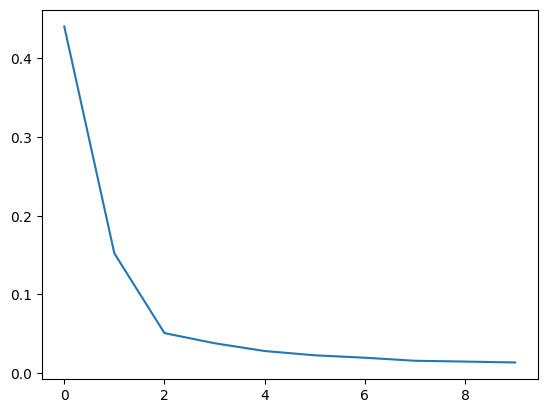

In [47]:
# Pipe a scaler to PCA with 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_f)

# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

From the plot, we can reduce the components to 3, without having to sacrifice much of the explained variance.